# Average performance of best performing hyperparameters for each algorithm in Case 4

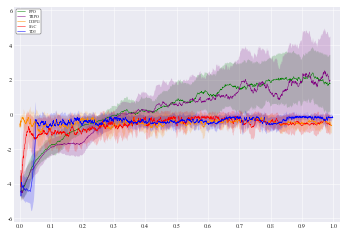

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

plt.style.use('seaborn')


seed_list = [0, 1, 2, 3, 4]
n_steps=50

fig = plt.figure(figsize=(5, 3.5))

########### Start wtih on policy results ###############################
algo_list = [ "PPO", "TRPO"]
color = ['green', 'purple']
batch_list_best = [16000, 16000]

for i, algo in enumerate(algo_list):
    batch = batch_list_best[i]
    df_list = []
    for j, seed in enumerate(seed_list):
        fname = ("./Case4/log_"+str(algo)+"_nested_regular_id-1-2_75_30_"+str(1e6)+"_"+str(batch)+"_"+str(5)+"_"+str(seed)+"/monitor.csv")  
        df = pd.read_csv(fname, skiprows=1)
        df['time'] = np.cumsum(df['l'].values)
        df_list.append(df)

    df_all = pd.concat(df_list).sort_values('time')
    timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
    smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
    path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
    under_line     = (smooth_path-path_deviation)
    over_line      = (smooth_path+path_deviation)
    plt.plot(timesteps, smooth_path, c=color[i], label=str(algo), linewidth = 0.5, zorder=2)
    art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
    art.set_edgecolor(None)



dt_list = [1e-4]
n_elem_list = [50]
total_timesteps = 5e5
run_comand_list = []

########### Now do off policy results ###############################
algo_list_offpolicy = ["DDPG","SAC","TD3"] 
color = ['darkorange', 'red', 'blue']
batchsize_list_offpolicy_best = [500000, 500000, 500000]
tau_list_best = [0.005, 0.005,0.005]
timesteps = 0.5e6

for i, algo_name in enumerate(algo_list_offpolicy):
    batch = batchsize_list_offpolicy_best[i]
    tau = tau_list_best[i]
    df_list = []
    for j, seed in enumerate(seed_list):

        fname = ("./Case4/log_"+str(algo_name)+"_nested_regular_id-1-2_75_30_"+str(1e6)+"_"+str(batch)+"_"+str(5)+"_"+str(seed)+"/monitor.csv")  
        df = pd.read_csv(fname, skiprows=1)
        df['time'] = np.cumsum(df['l'].values)
        df_list.append(df)

    df_all = pd.concat(df_list).sort_values('time')
    timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
    smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
    path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
    under_line     = (smooth_path-path_deviation)
    over_line      = (smooth_path+path_deviation)
    plt.plot(timesteps, smooth_path, c=color[i], label=str(algo_name), linewidth = 0.5, zorder=2)
    art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
    art.set_edgecolor(None)

font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=4.3)

leg = plt.legend(ncol=1, loc="upper left", frameon = True,   framealpha=1.0,  labelspacing=0.2, 
                 borderpad = 0.2, prop=font)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_facecolor('w')

plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
plt.xticks(np.linspace(0,1e6, 11), fontsize =6.2, fontname='Times New Roman')

plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
plt.yticks([-6, -4, -2, 0, 2, 4, 6], fontsize =6.2, fontname='Times New Roman')
# plt.yticks([-5, -2.5, 0, 2.5, 5], fontsize =6.2, fontname='Times New Roman')

gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))

plt.tight_layout()

plt.ylim([-6.2, 6.2])
plt.xlim([-0.02e6, 1.02e6])

plt.tick_params(axis='both', which='major', pad=1)

gca().grid(linewidth=0.5)
plt.savefig('Case4-learning_curve.png', format='png', bbox_inches='tight',dpi=300)
# plt.show()


# Average results for different replay buffer sizes (Off Policy Algorithm)

Batchsize variations were not considered for on policy algorithms for this case.

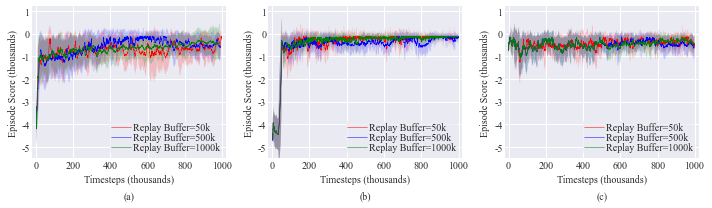

In [3]:

color = ['red', 'blue', 'green', 'orange', 'purple', '#1b9e77', '#66a61e', 'darkgrey']

label = ['(a)','(b)','(c)']

seed_list = [0,1, 2, 3, 4] #3, 4]
algo_list_offpolicy = ["SAC", "TD3","DDPG"]
batchsize_list = [50000, 500000, 1000000]

dt_list = [1e-4]
n_elem_list = [50]

run_comand_list = []

fig = plt.figure(figsize=(10,3))

for i, algo in enumerate(algo_list_offpolicy):
    plt.subplot(1,3,i+1)

    for k, batch in enumerate(batchsize_list):
        df_list = []
        for j, seed in enumerate(seed_list):
            fname = ("./Case4/log_"+str(algo)+"_nested_regular_id-1-2_75_30_"+str(1.0e6)+"_"+str(batch)+"_"+str(5)+"_"+str(seed)+"/monitor.csv")
            df = pd.read_csv(fname, skiprows=1)
            df['time'] = np.cumsum(df['l'].values)
            df_list.append(df)

        df_all = pd.concat(df_list).sort_values('time')
        timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
        smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
        path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
        under_line     = (smooth_path-path_deviation)
        over_line      = (smooth_path+path_deviation)
        plt.plot(timesteps, smooth_path, c=color[k], label="Replay Buffer="+str( int(batch/1000))+"k", linewidth = 0.5, zorder=2)
        art = plt.fill_between(timesteps, under_line, over_line, color=color[k], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
        art.set_edgecolor(None)

    plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
    plt.xticks(np.linspace(0,1.0e6, 6), fontsize =10, fontname='Times New Roman')
    plt.xlabel('Timesteps (thousands)\n'+label[i], fontsize = 10, fontname='Times New Roman',linespacing = 1.75)
    plt.xlim([-0.02e6, 1.02e6])

    plt.setp(plt.gca().get_yaxis().get_offset_text(), visible=False)
    plt.yticks([-5.0,-4, -3, -2, -1, 0, 1], fontsize =10, fontname='Times New Roman')
    plt.ylabel('Episode Score (thousands)', fontsize = 10, fontname='Times New Roman')
    plt.ylim([-5.5, 1.2])

    gca().grid(linewidth=1.0)
    plt.tick_params(axis='both', which='major', pad=2)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
    gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))

    font = font_manager.FontProperties(family='Times New Roman', weight='normal', style='normal', size=10)
    leg = plt.legend( ncol=1, loc="lower right", frameon = True,   framealpha=0.7,  handletextpad=0.2,
             labelspacing=0.0, borderpad = 0.1, prop=font, columnspacing=0.3, shadow=None, fancybox = False)
    leg.get_frame().set_linewidth(0.0)
        
plt.tight_layout()
plt.savefig('Case4_offpolicy.png', dpi=300,bbox_inches='tight')
# plt.show()